#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 1


### Name: Bozhou Yan


### Due: Oct. 2, 2019


## Goal:  The goal of this homework is to practice implementing a logistic regression model and gradient descent as well as to explore some theoretical concepts.

You will need the following packages below to do the homework.  Please DO NOT import any other packages.

In [2]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

## Problem 1: Gradient Descent (40 pts total)

In this problem we will study gradient descent for optimization.

### Part (a) (10pts) Implementing gradient descent with a fixed learning rate

Using autograd, implement gradient descent with a fixed learning rate for a general function.

In [3]:
"""
Input:
    fun : function
    x0  : initial point
    lr  : fixed learning rate
    iterations : number of iterations to perform
    
Return:
    x   : minimizer to fun
"""
def gradient_descent_fixed(fun, x0, lr, iterations):
   
    x=np.asarray(x0).astype('float64')
    for i in range(0,iterations):
        grad_fun=grad(fun)
        #print("iteration=",i,"current x ",x,"current grad: ",grad_fun(x))
        x=x-(lr*grad_fun(x))
        
    return x


### Part (b) (10 pts) Using a variable learning rate

Sometimes it is necessary to decrease our learning rate as we iterate to help gradient descent converge.  Implement gradient descent below where the learning rate at iteration $i$ is given by
$$
\mathrm{lr}_i = \frac{\mathrm{lr}_0}{i+1}.
$$

In [4]:
"""
Input:
    fun : function
    x0  : initial point
    lr  : initial learning rate
    iterations : number of iterations to perform
    
Return:
    x   : minimizer to fun
"""
def gradient_descent_variable(fun, x0, lr, iterations): 
    grad_fun=grad(fun)
    x=np.asarray(x0).astype('float64')
    lr_variable=lr
    for i in range(0,iterations):
        lr_variable=lr/(i+1)
        x=x-lr_variable*grad_fun(x)
    return x

### Part (c) (10 pts)  Choosing the learning rate

Let $\alpha$ denote the learning rate and consider the function $f(x) = \frac{1}{2}x^2$.  The gradient descent update rule at iteration $n+1$ is given by
$$
x_{n+1} = x_n - \alpha f'(x_n)
$$
Is there a critical value $\alpha_0$ so that if $\alpha \ge \alpha_0$ then gradient descent will not converge for $f(x)$?  If so what is it and explain why?

Answer goes here: Yes, $ \alpha_0 =2 $ would be such a critical value. Since $ f'(x)=x $ we know $x_{n+1}= (1-\alpha)x_n $, if alpha is greater than 2 then $|x|$ will increase and never converge; if $\alpha = 2$ then this update rule will only flip the sign of x and do nothing else.

### Part (d)  (10 pts) Feature scaling

Oftentimes it is advantageous to rescale or normalize our features.  As a toy example suppose we want to predict a person's weight (in kgs.) based on their height.  We would like an algorithm that gives equally good predictions whether height is measured in centimeters or kilometers.  For a concrete example, consider the 2D optimization problems:
$$
\mathrm{argmin}_{x\in \mathbb{R}^2}\ x^T \Sigma_i x, \quad i = 1,2
$$
where
$$
\Sigma_1 = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}, \quad 
\Sigma_2 = \begin{bmatrix}
1 & 0\\
0 & 100
\end{bmatrix}.
$$
Suppose our starting point is the same $x_0 = (1, 1)^T$ for both optimization problems.  For a fixed learning rate, will gradient descent perform better on problem $i=1$ or $i=2$?  Explain why.

Answer goes here: It will likely perform better on problem i=1 since in i=2 the second field of x will have a significantly higher impact on the gradient than the first field, thus resulting in the algorithm facing more trouble while tring to locate the minimum.


## Problem 2:  Logistic Regression (60 pts total)

In this problem you will implement all of the steps that are taken care of whenever the "fit" function from sci-kit is called.

### Part (a) (15 pts) Logisitc Unit

For binary classification $y \in \{0,1\}$ we will model the posterior probability $p(y = 1 | x)$ with the logistic unit 
$$
h(x; w) = \frac{1}{1 + \exp(-w^Tx)}
$$
We will use the convention that $x_0 = 1$.  Implement this function below using the skeletal outline as a guide.  Suppose we use a discriminant function $f(x)$ which assigns the label $y = 1$ if $p(y = 1 | x) \ge 0.5$ and $0$ otherwise.  In other words, with a discriminant function we do not need the posterior probabilities but rather skip straight to the classification.  


Give a geometric interpretation of our classifier once the parameters $w$ have been learned.  What does the angle between $w$ and $x$ tell us about the predicted class value?  For which angles do we predict $y=1$?

In [5]:
"""
Input:
    w: weight vector
    X: data

Return:
    logits : h(x;w)
"""
def logistic_unit(X, w):
    logits=np.reciprocal(1+np.exp(-np.dot(X,w)))
    return logits



Answer goes here: If the angle between W and x is large, then $ -w^T x$ becomes large as well, then the denominator of our logit also gets large which makes the probability small, and vice versa. For angles less than 90 degrees, $ exp(- w^T x) <1 $ therefore $h(x;w)>0.5$ and we predict y=1. 



### Part (b) (10 pts) Deriving the loss function

We have implicitly made the assumption that $y|x \sim \mathrm{Bernoulli}(h(x;w))$.  If we have an iid dataset $\{(x_i,y_i)\}_{i=1}^N$, then we can write the data likelihood as
$$
p(\vec{y}| X, w) = \prod_{i=1}^N p(y_i | x_i, w)
$$
We can learn the parameter $w$ by maximizing this probability (i.e. we find the MLE) or equivalently minimizing $J(w) = -\log p(\vec{y} | X, w)$.  Derive the loss function $J(w)$ step-by-step and implement it using the skeletal outline below.

Derivation goes here:
    

In [6]:
"""
Input:
    w : weight vector
    X : dataset features
    y : dataset targets

Return:
    J : loss of w given X,y
"""
def loss(w, X, y):
    
    cumulated_log_likelihood=0
    
    for i in range(0,len(X)):
        current_logit=logistic_unit(X[i],w)
      
        #print(cumulated_likelihood,"**",current_logit)
        
        cumulated_log_likelihood=cumulated_log_likelihood-np.log(np.power(current_logit,y[i])*np.power((1-current_logit),(1-y[i])))
    
    #print("cl",cumulated_likelihood)      
    J=cumulated_log_likelihood
    
    return J


### Part (c) (5 pts) Splitting the data for training and testing

Now we'll actually learn a logistic regression model for some synthetic data.

First split the dataset into a training, validation, and test set.  Use a 40/40/20 split (roughly 40/40/20 is fine).

In [7]:
# We first generate some fake data.
X, y = make_blobs(n_samples = 10000, centers = 2, n_features =20, cluster_std =20)

# We'll also augment the data so that x_0 = 1 for the intercept term.
X = np.append(np.ones((len(X), 1)), X, axis = 1)

index=[]

for i in range(0,10000):
    index.append(i)
    
np.random.shuffle(index)

"""Randomize the data cuz why not"""

shuffled_X=[]
shuffled_y=[]

for i in range(0,10000):
    shuffled_X.append(X[index[i]])
    shuffled_y.append(y[index[i]])
    


X_train=shuffled_X[0:4000]
y_train=shuffled_y[0:4000]

X_val=shuffled_X[4000:8000]
y_val=shuffled_y[4000:8000]

X_test=shuffled_X[8000:10000]
y_test=shuffled_y[8000:10000]


### Part (d) (20pts) 

Now use your gradient descent function to learn the parameters $w$ using 1000 iterations.  You may choose the learning rate and initial parameters $w_0$ for this problem.  Compare both the fixed learning rate and variable learning rate gradient descents side by side (i.e. 2 subplots).

For each method, plot the loss of both the training set and the validation set.  Make sure your plots are labeled properly with $x$ and $y$ axis labels, a legend, title, and different colors to distinguish the two curves on each subplot.

In [8]:
w_init=np.asarray(np.append([0],np.ones(20)))
w_init=np.multiply(w_init,0.01)

ite=1000

def loss_wrt_W(w):
    return loss(w,X_train,y_train)

def monitored_descent_fixed(loss_fun,x0,lr,iterations,loss_storage):
    x=np.asarray(x0).astype('float64')

    for i in range(0,iterations):
                                                                 
        #keeping track of the losses for X_train and X_val
        #if (i<=24) or (i % 10==0 and i<=100) or (i % 100 == 0):      
        t_loss=loss(x,X_train,y_train)
        v_loss=loss(x,X_val,y_val)
        loss_storage.append([t_loss,v_loss,int(i)])       
        
        x=gradient_descent_fixed(loss_fun, x, lr, 1)       
    return x

def monitored_descent_variable(loss_fun,x0,lr,iterations,loss_storage):
    x=np.asarray(x0).astype('float64')

    for i in range(0,iterations):

        #if (i<=24) or (i % 10==0 and i<=100) or (i % 100 == 0):
        t_loss=loss(x,X_train,y_train)
        v_loss=loss(x,X_val,y_val)
        loss_storage.append([t_loss,v_loss,int(i)]) 
        
        
        x=gradient_descent_variable(loss_fun, x, lr, 1)       
    return x

loss_tracker_fixed=[]
w_fixed=monitored_descent_fixed(loss_wrt_W, w_init, 0.000001, ite,loss_tracker_fixed)
#np.savetxt("weight by fixed lr.txt",w_fixed)
#np.savetxt("tracked loss by fixed lr.txt",loss_tracker_fixed)
print("done with fixed") 

loss_tracker_variable=[]
w_variable=monitored_descent_variable(loss_wrt_W, w_init, 0.000005, ite,loss_tracker_variable)
#np.savetxt("weight by variable lr.txt",w_variable)
#np.savetxt("tracked loss by variable lr.txt",loss_tracker_variable)
print("done with variable")

done with fixed
done with variable


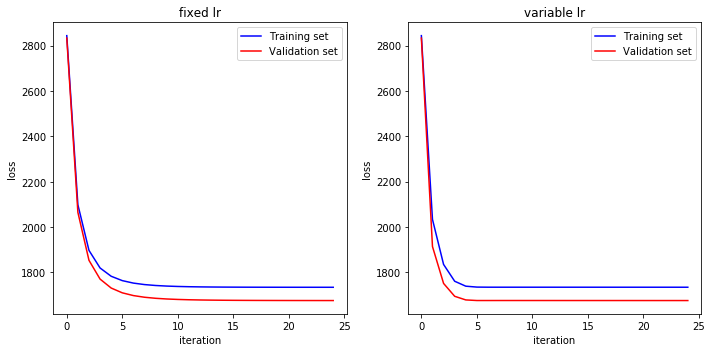

In [9]:
fig = plt.figure(figsize = (10, 5))

x = []

for i in range(0,25):
       #if (i<=24) or (i % 10==0 and i<=100) or (i % 100 == 0):
         x.append(i)
            
"""I am only going to plot the first 25 iterations since the loss tends to converge wayyyyyy before our model is done training."""

ax1 = plt.subplot(121)
y1 = np.asarray([loss_tracker_fixed[i][0] for i in range(len(x))])
y2 = np.asarray([loss_tracker_fixed[i][1] for i in range(len(x))])
ax1.plot(x, y1, 'b',label='Training set')
ax1.plot(x,y2,'r',label='Validation set')
ax1.set_xlabel(r'iteration')
ax1.set_ylabel(r'loss')
ax1.set_title(r'fixed lr')
plt.legend();

ax2 = plt.subplot(122)
z1 = np.asarray([loss_tracker_variable[i][0] for i in range(len(x))])
z2 = np.asarray([loss_tracker_variable[i][1] for i in range(len(x))])
ax2.plot(x, z1, 'b',label='Training set')
ax2.plot(x,z2,'r',label='Validation set')
ax2.set_xlabel(r'iteration')
ax2.set_ylabel(r'loss')
ax2.set_title(r'variable lr')

plt.legend();
plt.tight_layout();

### Part (e) (10 pts) Evaluating the model on the test set

Finally, we have trained our models and are ready to evaluate them on the test set.  For binary classification one way to check our classifier is to make a confusion matrix of our predictions.
$$
C = \begin{bmatrix}
\text{Predict 0, Actual 0} & \text{Predict 0, Actual 1}\\
\text{Predict 1, Actual 0} & \text{Predict 1, Actual 1}
\end{bmatrix}
$$
The diagonal elements are the number of samples that are correctly classified.

Use your trained models to classify samples in the test set according to whether $h(x_i; w) \ge 0.5$ or not and print the confusion matrices.  Also print the accuracy rate which is just the percentage of correctly classified examples for both models.

In [10]:
C_fixed=[0,0,0,0]
C_variable=[0,0,0,0]
p=1
q=1
for i in range(0,len(X_test)):
    
    p=logistic_unit(w_fixed,X_test[i])
    
    if p>=0.5:
        if y_test[i]==1:
            C_fixed[3]+=1
        elif y_test[i]==0:
            C_fixed[2]+=1
    elif p<0.5:
        if y_test[i]==1:
            C_fixed[1]+=1
        elif y_test[i]==0:
            C_fixed[0]+=1
    
    q=logistic_unit(w_variable,X_test[i])
    if q>=0.5:
        if y_test[i]==1:
            C_variable[3]+=1
        elif y_test[i]==0:
            C_variable[2]+=1
    elif q<0.5:
        if y_test[i]==1:
            C_variable[1]+=1
        elif y_test[i]==0:
            C_variable[0]+=1
            
acc_fixed=100*(C_fixed[0]+C_fixed[3])/((C_fixed[0]+C_fixed[1]+C_fixed[2]+C_fixed[3]))
acc_variable=100*(C_variable[0]+C_variable[3])/((C_variable[0]+C_variable[1]+C_variable[2]+C_variable[3]))
print("With fixed learning rate, C: ",C_fixed," accuracy rate= ",acc_fixed,"%")
print("With variable learning rate, C: ",C_variable," accuracy rate= ",acc_variable,"%")

With fixed learning rate, C:  [761, 205, 217, 817]  accuracy rate=  78.9 %
With variable learning rate, C:  [762, 207, 216, 815]  accuracy rate=  78.85 %
